## Load three datasets

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def load_datasets(*filepaths):
    dataframes = []
    for path in filepaths:
        try:
            df = pd.read_csv(path)
            dataframes.append(df)
        except Exception as e:
            print(f"Error loading {path}: {e}")
            dataframes.append(None)
    return dataframes

In [57]:
file_1 = '../data/benin_clean.csv'
file_2 = '../data/togo_clean.csv'
file_3 = '../data/sierraleone_clean.csv'
df_benin, df_togo, df_sierraleone = load_datasets(file_1, file_2, file_3)

df_benin['Country'] = 'Benin'
df_togo['Country'] = 'Togo'
df_sierraleone['Country'] = 'Sierra Leone'

### Concatinating all three datasets

In [60]:
df = pd.concat([df_benin, df_togo, df_sierraleone], ignore_index=True)

## Metric Comparison

### Boxplots of GHI, DNI, DHI

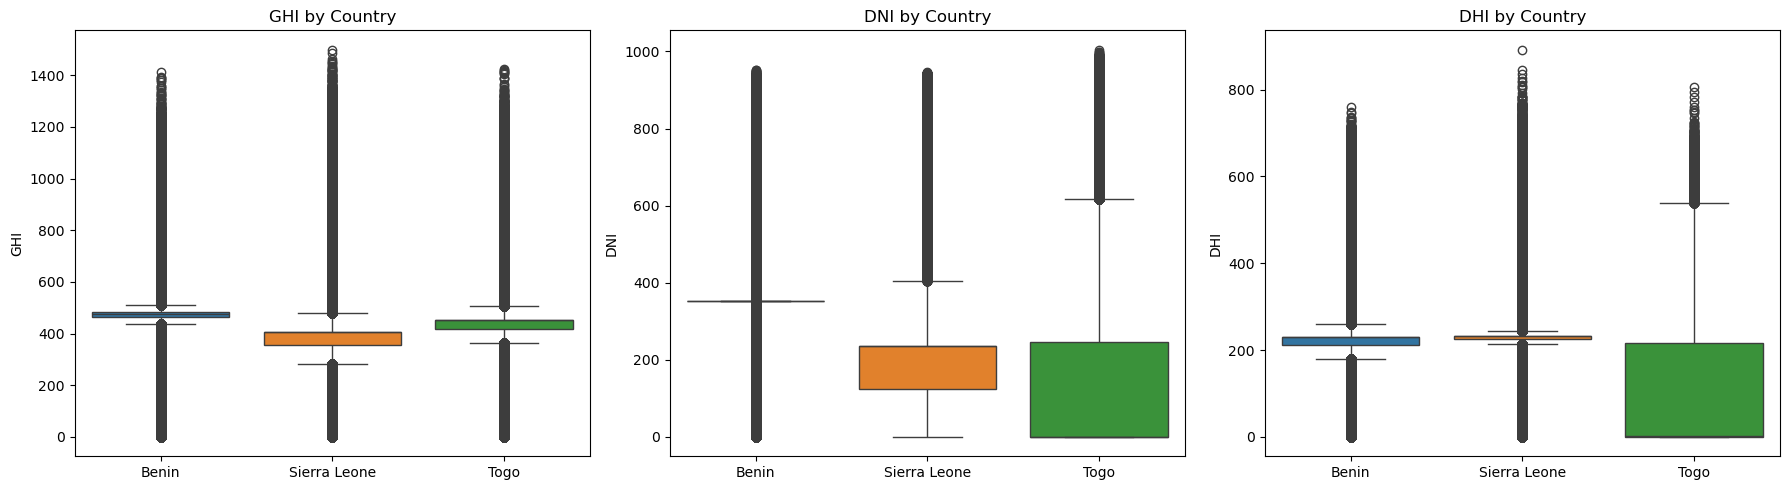

In [70]:
palette = {
    'Benin': '#1f77b4',
    'Sierra Leone': '#ff7f0e',
    'Togo': '#2ca02c'
}

metrics = ['GHI', 'DNI', 'DHI']
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, metric in enumerate(metrics):
    sns.boxplot(
        x='Country',
        y=metric,
        hue='Country',
        data=df_all,
        ax=axes[i],
        palette=palette,
        dodge=False  
    )
    axes[i].set_title(f'{metric} by Country')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

In [ ]:
### Summary Table